In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import h5py
import matplotlib.pyplot as plt

import ase
import ase.visualize
from ase.visualize import view

from molnet.data.datasets import edafm
from molnet.data.utils import atom_map_generator, get_image_and_atom_map_np


In [2]:
for i, (x, atom_map, xyz) in enumerate(
    atom_map_generator(
        '/l/data/small_fragments/afm.h5',
        jnp.array([1, 6, 7, 8, 9]),
        2,
        2.0,
        0.125,
        0.2
    )
):

    print(x.shape, atom_map.shape)
    xyz = xyz[0]
    atom_map = atom_map[0]
    break

[[ 4.3279171e+00  1.5681386e+00 -6.2861275e-03]
 [ 4.6451697e+00 -2.7344360e+00 -2.7702083e-03]
 [-3.0053444e+00  4.2835259e+00 -3.4924597e-09]
 [-6.0953517e+00  1.2494462e+00 -1.3177496e-03]
 [-1.2849324e+00  2.4956338e+00 -1.1847084e-03]
 [ 2.1817389e+00 -2.9213550e+00 -2.1702521e-03]
 [-2.8925791e-01 -3.0104764e+00 -5.3551048e-09]
 [-5.4332800e+00  3.6754689e+00  0.0000000e+00]
 [ 1.8537818e+00  1.3850758e+00 -5.5052713e-03]
 [ 5.7391143e+00 -4.9008465e-01 -4.9391184e-03]]
[[ 4.6500936e+00 -5.7014024e-01 -4.7860900e-03]
 [-4.6680899e+00  2.8967695e+00 -7.3644519e-04]
 [ 3.8583829e+00  5.8184916e-01 -5.4721879e-03]
 [ 4.0360031e+00 -1.8279150e+00 -3.6177193e-03]
 [-5.0477786e+00  1.5534226e+00 -1.5624883e-03]
 [ 2.4666049e+00  4.8316786e-01 -5.1367143e-03]
 [ 2.6468315e+00 -1.9337729e+00 -3.3269657e-03]
 [-3.3107853e+00  3.2356765e+00 -7.6701713e-04]
 [-4.0714164e+00  5.6234175e-01 -2.5356496e-03]
 [-4.9882549e-01 -1.9441655e+00 -1.0050787e-03]
 [-1.6707102e+00 -1.6717218e-01 -2.0680

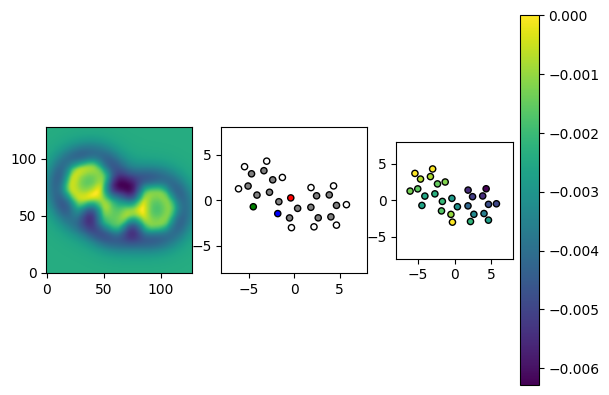

In [3]:
COLORS = {1: "w", 6: "gray", 7: "blue", 8: "red", 9: "green"}

xyz = xyz[xyz[:, -1] != 0]
mol = ase.Atoms(positions=xyz[:, :3], numbers=xyz[:, -1])

ax = plt.subplot(131)
ax.imshow(x[0, ..., 0], origin='lower')

ax = plt.subplot(132)
ax.scatter(xyz[:, 0], xyz[:, 1], c=[COLORS[z] for z in xyz[:, -1]], s=20, edgecolors='k')

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_aspect('equal')

ax = plt.subplot(133)
xyz = xyz[xyz[:, 2].argsort()]
im = ax.scatter(xyz[:, 0], xyz[:, 1], c=xyz[:, 2], s=20, edgecolors='k', cmap='viridis')
plt.colorbar(im)
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_aspect('equal')

(5, 128, 128, 21)


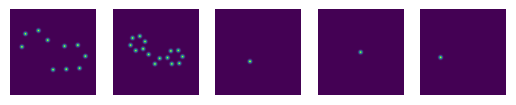

In [4]:
print(atom_map.shape)
for i in range(atom_map.shape[0]):
    ax = plt.subplot(1, atom_map.shape[0], i + 1)
    ax.imshow(atom_map[i, ..., -1], origin='lower')
    ax.axis('off')

In [8]:
print(xyz_0.shape)

(54, 5)


(54, 5)
(5, 54, 3)


/tmp/ipykernel_2106077/1557775874.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(species_matrix[:, 0], species_matrix[:, 1], s=20, edgecolors='k', cmap='viridis')


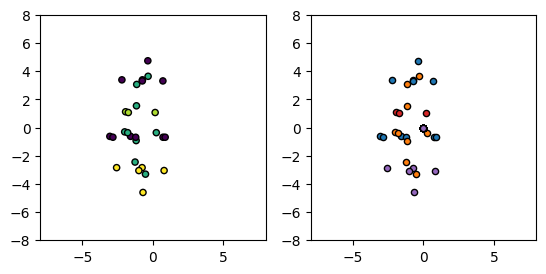

In [36]:
# split xyz_0 by last column
atomic_numbers = jnp.array([1, 6, 7, 8, 9])
print(xyz_0.shape)

def filter_by_species(sp):
    # Select rows where the atomic species matches
    return jnp.where(jnp.isin(xyz_0[:, -1], sp)[:, None], xyz_0[:, :3], jnp.zeros_like(xyz_0[:, :3]))

# Vectorize the filtering function across all species
species_matrices = jax.vmap(filter_by_species)(atomic_numbers)

print(species_matrices.shape)

ax = plt.subplot(121)

unpadded_xyz0 = xyz_0[xyz_0[:, -1] != 0]
ax.scatter(unpadded_xyz0[:, 0], unpadded_xyz0[:, 1], c=unpadded_xyz0[:, -1], s=20, edgecolors='k', cmap='viridis')
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_aspect('equal')

ax = plt.subplot(122)
for i, species_matrix in enumerate(species_matrices):
    ax.scatter(species_matrix[:, 0], species_matrix[:, 1], s=20, edgecolors='k', cmap='viridis')

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_aspect('equal')

In [29]:
def generator():
    for i in range(1000):
        x, y, xyz = get_image_and_atom_map_np(
            '/l/data/small_fragments/afm.h5',
            i,
            jnp.array([1, 6, 7, 8, 9]),
            "train",
            2.0,
            0.125,
            0.2
        )
        if x is None:
            continue

        yield x, y, xyz

gen = generator()

In [34]:
x, y, xyz = next(gen)
print(x.shape, y.shape, xyz.shape)

(128, 128, 10) (5, 128, 128, 20) (20, 5)


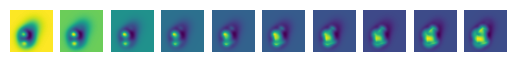

In [35]:
# Plot input image
for i in range(x.shape[-1]):
    ax = plt.subplot(1, 10, i + 1)
    ax.imshow(x[..., i], origin='lower')
    ax.axis('off')

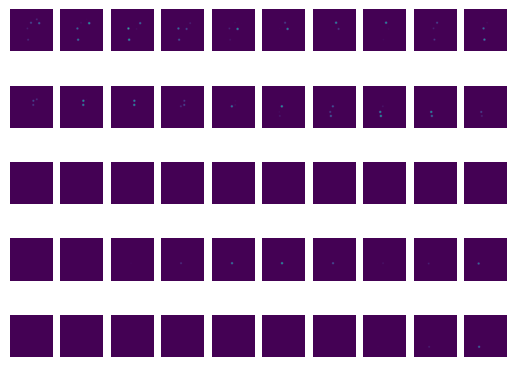

In [40]:
# Plot atom maps
for i in range(y.shape[0]):
    for j in range(y.shape[-1]//2):
        ax = plt.subplot(y.shape[0], y.shape[-1]//2, i * y.shape[-1]//2 + j + 1)
        ax.imshow(y[i, ..., j*2], origin='lower', vmin=0, vmax=1)
        ax.axis('off')

In [39]:
mol = ase.Atoms(positions=xyz[:, :3], numbers=xyz[:, -1])
view(mol)

<Popen: returncode: None args: ['/u/79/kurkil1/unix/.venvs/molnet/bin/python...>